# IRIS Flower Classification

The data set contain 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly seperable from the other 2. the latter are not linearly sperable from each other.

Attribute information:
    1. sepal length in cm.
    2. sepal width in cm.
    3. petal length in cm
    4. petal width in cm

# Importing python libraries

In [56]:
import pandas as pd

In [57]:
import numpy as np

In [58]:
import os

In [59]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset

In [62]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

In [63]:
col_name = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']

In [64]:
dataset = pd.read_csv(url, names = col_name)

Shape of the data array

In [65]:
dataset.shape



(150, 5)

In [66]:
dataset.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-lenght  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
dataset.describe()


,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking the number of rows that belongs to each class

In [69]:
dataset['class'].value_counts()


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

# Data Visualization

VIOLIN PLOT

Plotting the violin plot to check the comparison of a variable distribution:


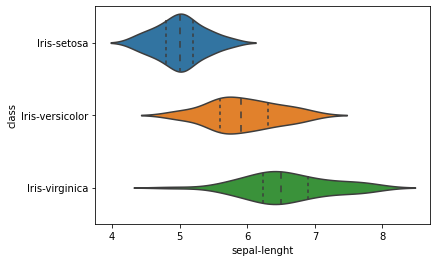

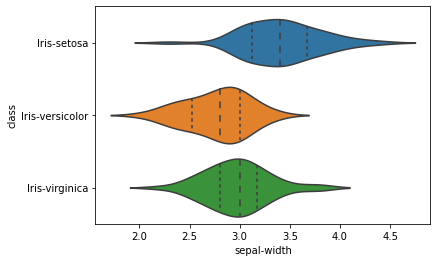

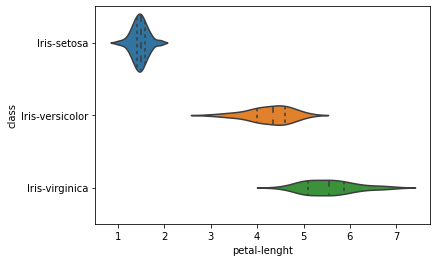

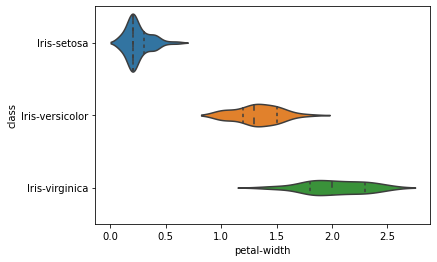

In [70]:
sns.violinplot(y='class', x='sepal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

These plots say that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

PAIR PLOT


Plotting multiple pairwise bivariate distributions in a dataset using pairplot:


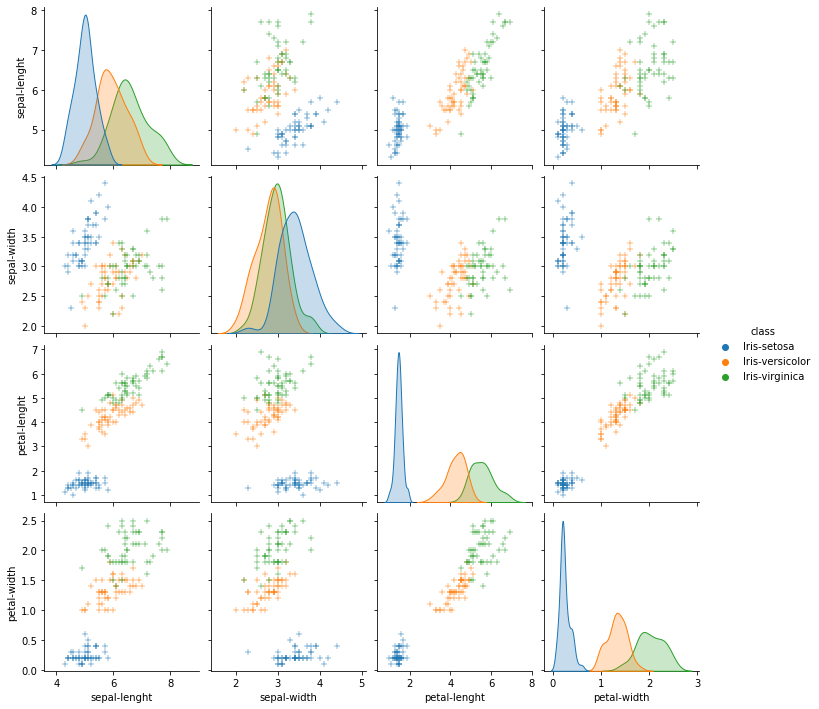

In [71]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

It shows that Iris-Setosa is separated from both other species in all the features.

HEATMAP

Plotting the heatmap to check the correlation.
dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.

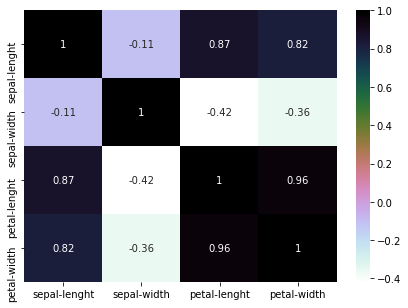

In [72]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

# Model Building

Splitting the dataset

In [73]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


Splitting dataset into training set and test set

In [74]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], random_state=0)


# Training set

In [75]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


# Test set

In [76]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


To make a prediction for a new data point, the algorithm finds the point in the training set, then it assigns the label of this training point to the new data point.
The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (like one, or three neighbors — as the following image shows). We can now make a prediction using the majority class among them. For our example, we will use one neighbor (k=1).

In [77]:
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting method of the knn object, building our model on the training set

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Making predictions using this model on any new data for which we might not know the correct labels

Suppose let us assume 
1. sepal length of 10 cm
2. sepal width of 5.7 cm
3. petal length of 2 cm
4. petal width of 0.5 cm.

In [79]:
X_new = np.array([[10, 5.7, 2, 0.5]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


# predict method of the knn object

In [80]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its classified as a setosa.

# Measuring the model


In [81]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score (np.mean): {:.2f}".format(np.mean(y_pred == y_test)))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score (np.mean): 0.97


So the accuracy is 97%